In [1]:
#simple linear regression
#Boston dataset 
from sklearn.datasets import load_boston  
boston = load_boston() 

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import matplotlib as mpl

In [3]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)  
dataset['target'] = boston.target

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.mlab as mlab

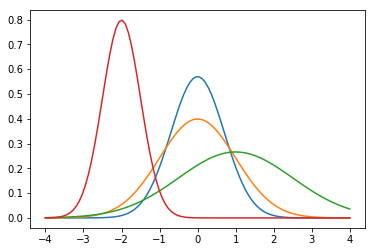

In [5]:
# normal distribution 
import math 
x = np.linspace(-4,4,100) 
for mean, variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:    
    plt.plot(x,mlab.normpdf(x,mean,variance)) 
plt.show()

In [6]:
# calculate the mean of the value of the 506 tracts in Boston
mean_expected_value = dataset['target'].mean() 

In [7]:
#to measure the difference between the prediction and the real value
#calculate squared sum of errors
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2  
SSE = np.sum(Squared_errors)  
print ('Sum of Squared Errors (SSE): %01.f' % SSE) 

Sum of Squared Errors (SSE): 42716


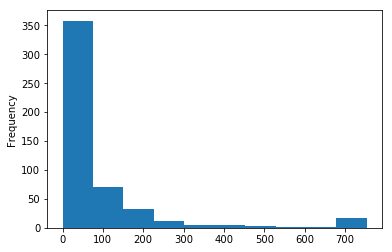

In [8]:
#visualize it as a distribution of errors
density_plot = Squared_errors.plot('hist')

In [9]:
#to measure relationship between two variables: correlation
# First, your variables have to be standardized(or your result won't be a correlation but a covariation)
def standardize(x):           
    return (x-np.mean(x))/np.std(x)

In [10]:
#Pearson's correlation is really covariance calculated on standardized variables
#so we define the correlation function as a wrapper of both the covariance and standardize ones 
def covariance(variable_1, variable_2, bias=0):       
    observations = float(len(variable_1))      
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2)))/(observations-min(bias,1))

def standardize(variable):      
    return (variable - np.mean(variable)) / np.std(variable)
  
def correlation(var1,var2,bias=0):      
    return covariance(standardize(var1), standardize(var2),bias)

from scipy.stats.stats import pearsonr  
print ('Our correlation estimation: %0.5f' %(correlation(dataset['RM'], dataset['target'])))  
print ('Correlation from Scipy pearsonr estimation: %0.5f' %pearsonr(dataset['RM'], dataset['target'])[0])


Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


In [ ]:
# so the average number of rooms in houses in the area is 0.695

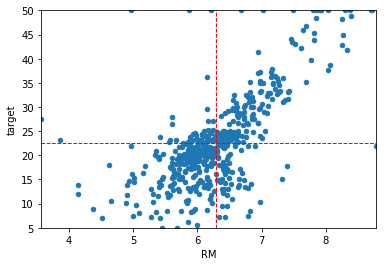

In [12]:
#graph for correlation
x_range = [dataset['RM'].min(),dataset['RM'].max()]  
y_range = [dataset['target'].min(),dataset['target'].max()]  
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target',xlim=x_range, ylim=y_range)  
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--' , color='red', linewidth=1)  
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)


In [ ]:
#The scatterplot also plots the average value for both the target and the predictor variables as dashed lines.

In [13]:
import statsmodels.api as sm  
import statsmodels.formula.api as smf

In [14]:
y = dataset['target']  
X = dataset['RM']  
X = sm.add_constant(X)

In [15]:
X.head()


,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [17]:
linear_regression = sm.OLS(y,X)  
fitted_model = linear_regression.fit()  
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.49e-74
Time:                        09:00:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print (fitted_model.params)  
betas = np.array(fitted_model.params)  
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


In [ ]:
# subtract the sum of squared errors of your regression model, to get the residual sum of squared errors

In [19]:
mean_sum_squared_errors = np.sum((dataset['target']-dataset['target'].mean())**2)  
regr_sum_squared_errors = np.sum((dataset['target']-fitted_values)**2)  
(mean_sum_squared_errors-regr_sum_squared_errors) / mean_sum_squared_errors


0.48352545599133401

In [20]:
# a better R-squared means a better model.
#R-squared correlation:
(pearsonr(dataset['RM'], dataset['target'])[0])**2


0.4835254559913339

In [21]:
#if you know the average number of rooms in an area of Boston, you can make a quick estimate of the expected value.
# coefficients are −34.6706 for the bias (also called the intercept)
#9.1021 for the RM variable
#y=bx+b0
#replace the betas and X with the estimated coefficients
#y=9.1021*xrm−34.6706
9.1021*4.55-34.6706

6.743955

In [25]:
residuals = dataset['target']-fitted_values  
normalized_residuals= standardize(residuals)


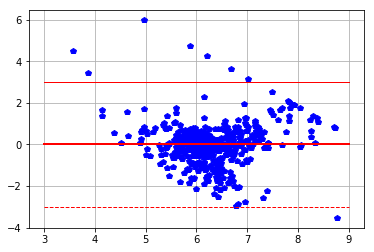

In [26]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals,'bp') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color='red', linewidth=2) 
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '-', color='red', linewidth=1) 
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color='red', linewidth=1) 
plt.grid()
#The resulting scatterplot indicates that the residuals show some of the problems we previously indicated as a warning that something is not going well with your regression analysis

In [33]:
import numpy as np  
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [34]:
#minimizing cost function
def squared_cost(v,e):     
    return np.sum((v-e)**2)

In [35]:
# the value that makes the least squared summation:
from scipy.optimize import fmin  
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))


Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [36]:
#We just output our best e value and verify if it actually is the mean of the x vector:
print ('The result of optimization is %0.1f' % (xopt[0]))  
print ('The mean is %0.1f' % (np.mean(x)))


The result of optimization is 7.8
The mean is 7.8


In [37]:
# try to figure out what minimizes the sum of absolute errors
def absolute_cost(v,e):     
    return np.sum(np.abs(v-e))
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))


Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [38]:
print ('The result of optimization is %0.1f' % (xopt[0]))

The result of optimization is 8.0


In [39]:
print ('The median is %0.1f' % (np.median(x)))

The median is 8.0
